In [1]:
import serial
import time
import re

In [2]:
# function for the clock
def current_time_millis():
    return int(round(time.time() * 1000))

# function to avoid messy serial data
def is_numeric_string(s):
    # regex to match a string that contains only digits
    pattern = r'^\d+$'
    
    if re.match(pattern, s):
        return True
    else:
        return False

In [3]:
arduino_port = "COM5"
baud_rate = 9600  

ser = serial.Serial(arduino_port, baud_rate, timeout=1)

time.sleep(1)

tap_data = []
time_data = []
start_time = current_time_millis()

try:
    while True:
        # Reading one line from serial
        if ser.in_waiting > 0:
            # getting the time data
            current_millis = current_time_millis()
            elapsed_time = current_millis - start_time

            # getting the tap data
            line = ser.readline().decode('utf-8').rstrip()

            # checking if the tap data is numeric using reg exp
            if is_numeric_string(line) is True:
                print(str(elapsed_time) + "," + str(line))

                # storing the data
                tap_data.append(line)
                time_data.append(elapsed_time)

            # adding delay to avoid overflow
            time.sleep(0.001)
            
except KeyboardInterrupt:
    print("Exiting Program")

finally:
    ser.close()


560,360
572,352
576,360
581,360
588,355
595,360
600,353
604,354
609,360
617,359
622,360
629,360
633,352
638,360
645,360
650,360
658,359
664,352
670,353
674,360
680,359
687,359
691,360
698,352
703,353
709,360
715,359
720,360
727,360
731,357
735,359
744,360
748,358
756,360
760,360
769,358
772,359
777,352
785,353
789,359
797,352
801,360
806,360
814,358
820,360
825,359
829,359
836,360
842,359
848,359
856,360
858,358
867,355
870,359
875,360
883,359
887,360
895,355
899,359
903,359
912,359
917,360
924,359
928,360
935,360
940,352
944,354
952,360
957,352
962,353
969,360
973,359
981,360
985,360
994,353
998,360
1004,355
1010,355
1015,360
1022,360
1027,359
1032,360
1038,355
1043,355
1051,360
1055,352
1060,360
1068,359
1074,360
1079,359
1084,359
1092,360
1096,359
1102,353
1108,353
1112,359
1120,359
1124,360
1130,360
1137,353
1143,360
1149,359
1154,360
1158,360
1166,360
1172,360
1178,360
1185,360
1190,359
1194,360
1199,352
1206,353
1213,359
1219,359
1223,359
1229,360
1235,359
1241,359
1247,360
1251,

SerialException: ClearCommError failed (OSError(22, 'The I/O operation has been aborted because of either a thread exit or an application request.', None, 995))

3762


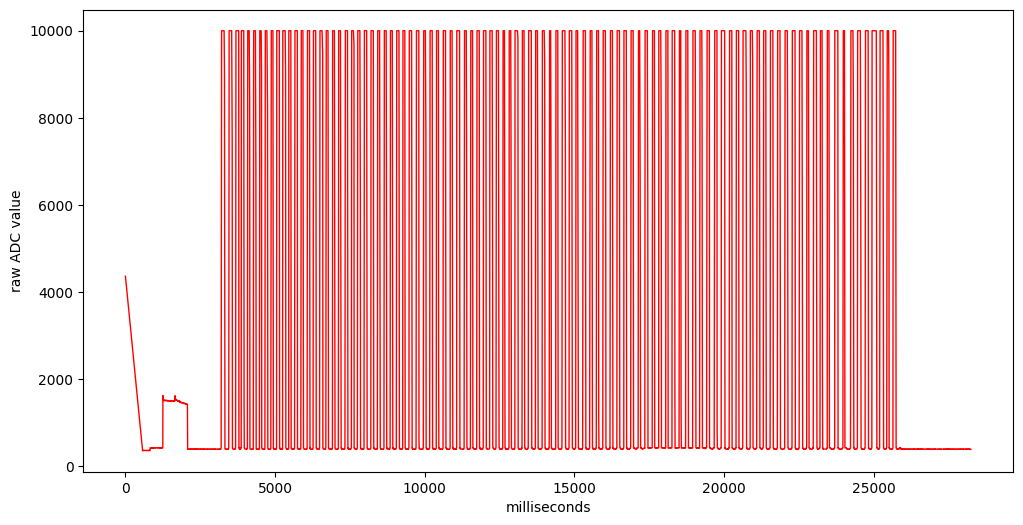

In [71]:
# converting tap data to int 
tap_data = [int(num) for num in tap_data]

print(len(tap_data)) 
# print(len(time_data)) 

from matplotlib import pyplot as plt
import pandas as pd

plt.figure(figsize=(12, 6))  
plt.plot(time_data, tap_data, lw = 1.0, color = 'r')
plt.xlabel('milliseconds')
plt.ylabel('raw ADC value')
plt.show()

data = {'tap_data': tap_data, 'time_data': time_data}
df = pd.DataFrame(data)
# print(df)


In [72]:
df.to_csv('s30_index_l.csv', index=False)
